# Evaluating your Classification Algorithm

## Building the Classification Algorithm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# read data
star_data = pd.read_csv("D:\ProjectData\pulsar_data.csv")

# drop rows containing missing values
star_data.dropna(inplace = True)

# remove spaces in column headings
star_data.columns = star_data.columns.str.strip()

# define input (X) and outpit (y) data of the algorithm
X = star_data.drop('target_class', 1)
y = star_data['target_class']


# perform data standardization
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()

X_ss = pd.DataFrame(s_scaler.fit_transform(X), 
                            columns = X.columns)

# split the data into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.25, random_state=42)


# build the support vector machine
from sklearn import svm 
clf_rbf = svm.SVC(kernel = 'rbf', C = 10)

clf_rbf.fit(X_train, y_train)

# obtain a set a of predictions
y_pred = clf_rbf.predict(X_test)

## Evaluating the Classification Algorithm

In [2]:
# obtain true positives, false positives, true negatives and false negatives
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)

TP = CM[1][1]
FP = CM[0][1]
TN = CM[0][0]
FN = CM[1][0]

#### Accuracy

In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9805950840879689

#### Precision

In [4]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9395604395604396

#### Recall

In [5]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.8341463414634146

#### False Positive Rate

In [6]:
False_Positive_Rate = FP/(FP + TN)

False_Positive_Rate

0.005203405865657522

#### Specifictity

In [7]:
Specificity = TN/(TN + FP)

Specificity

0.9947965941343425

#### Sensitivity 

In [8]:
Sensitivity= TP/(TP + FN)

Sensitivity

0.8341463414634146

#### F1 Score

In [9]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.883720930232558

#### AUROC Score

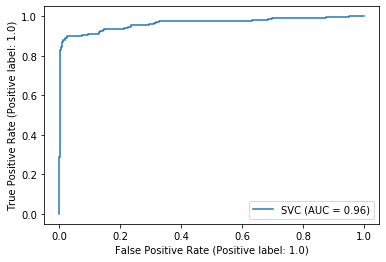

In [10]:
from sklearn import metrics

metrics.plot_roc_curve(clf_rbf, X_test, y_test) 

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_rbf.decision_function(X_test))

0.9649883471398574